In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

# Problem Set 4 (covers Lab 7)

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Introduction

Lab 7 was all about statistical inference, specifically, Bayesian statistical inference. You will use Bayesian inference on four  problems for this Problem Set [Goto Q1](#q1). You can paste all your code here:

In [3]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

<a id="q1"></a>
**Question 1.**

Fifteen volunteers were put on the Supper Dooper Human Kibble Diet(tm) for a month. They were weighed before and after 30 days. The makers of Supper Dooper Human Kibble Diet(tm) are anxious to see the results of this study because they are planning to offer a money back guarantee of "Lose 10 Pounds in 30 days or your money back!".

Based on the data, 

1. what is the probability that this claim can be made? 
2. If daily weight fluctuations can equal 5 pounds (in either direction). How probable is it that the diet doesn't work?
3. Is there a positive claim can be made with at least ~66% belief?

### part 1

In [4]:
data1 = {}
data1["start"] = [129, 174, 200, 229, 205, 133, 143, 222, 161, 201, 194, 181, 185, 126, 212]
data1["end"] = [134, 171, 190, 227, 206, 130, 129, 218, 138, 187, 191, 177, 183, 124, 205]
data1['start'] = np.array(data1['start'])
data1['end'] = np.array(data1['end'])

In [5]:
print('start mean',np.mean(data1['start']))
print('end mean',np.mean(data1['end']))
difference = data1['start'] - data1['end']
print('mean difference',np.mean(difference))

start mean 179.66666666666666
end mean 174.0
mean difference 5.666666666666667


From just the mean of the difference, it does not seem like this claim could be made.

In [6]:
np.random.seed([9235274])
start_posterior = bootstrap_sample( data1['start'], np.mean, 10000)
end_posterior = bootstrap_sample( data1['end'], np.mean, 10000)

In [7]:
bs_difference = start_posterior - end_posterior

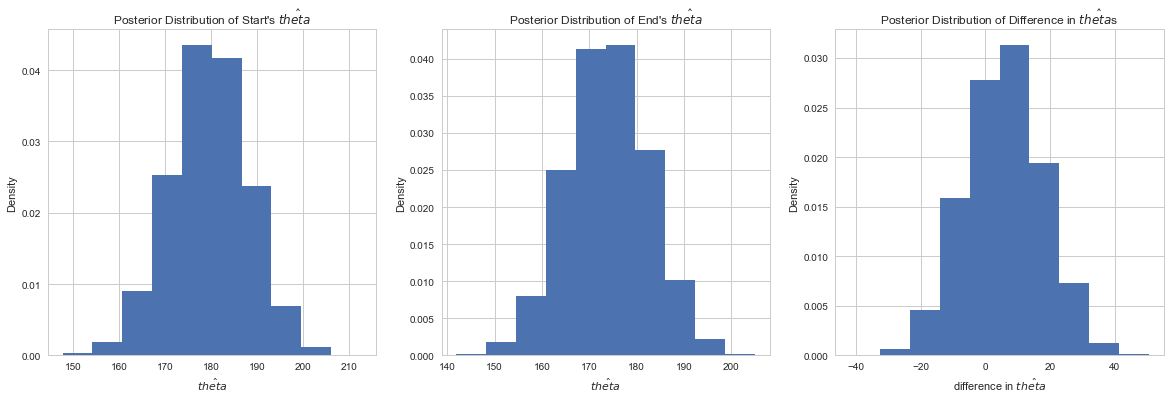

In [8]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( start_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Start's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( end_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of End's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( bs_difference, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [9]:
print( "90% BCI for start's theta:", stats.mstats.mquantiles( start_posterior, [0.05, 0.95]))
print( "90% BCI for end's theta:", stats.mstats.mquantiles( end_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( bs_difference, [0.05, 0.95]))

90% BCI for start's theta: [165.6 193.4]
90% BCI for end's theta: [159.93333333 188.13333333]
90% BCI for difference: [-13.86666667  25.4       ]


It seems that the true difference is not clearly different from 0, even with the large number of bootstrap samples.

In [10]:
np.mean(bs_difference >= 10)

0.3659

It appears that there is only a 36.6% chance that this claim could be made. 

### part 2

In [11]:
np.random.seed([9235274])
part2_start_result = []
part2_end_result = []
for i in range (1000):
    start = data1["start"] + np.random.uniform(-5,5,size=len(data1['start']))
    end = data1["end"] + np.random.uniform(-5,5,size=len(data1['end']))
    part2_start_result.append(np.mean(start))
    part2_end_result.append(np.mean(end))


In [12]:
part2_start_result = np.array(part2_start_result)
part2_end_result = np.array(part2_end_result)
rand_difference = part2_start_result - part2_end_result

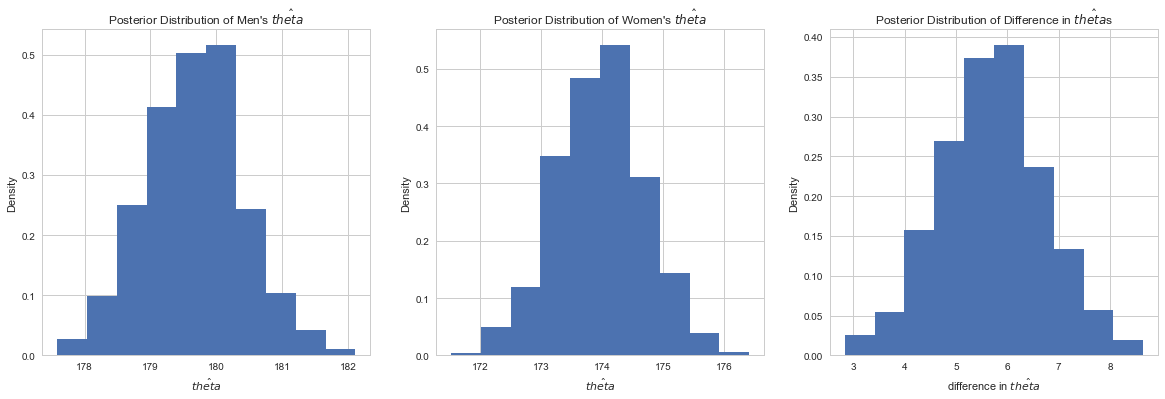

In [13]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( part2_start_result, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( part2_end_result, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( rand_difference, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [14]:
print( "90% BCI for start's theta:", stats.mstats.mquantiles( part2_start_result, [0.05, 0.95]))
print( "90% BCI for end's theta:", stats.mstats.mquantiles( part2_end_result, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( rand_difference, [0.05, 0.95]))

90% BCI for start's theta: [178.44946138 180.87687438]
90% BCI for end's theta: [172.7436259  175.16423968]
90% BCI for difference: [4.07393057 7.39699168]


It seems that 90% of the random differences were between 4.07 and 7.40, which does not lend credence to the idea that the difference is greater than 10. 

In [15]:
np.mean(rand_difference >= 10)

0.0

If on any given day the weight was uniformly distributed within + or - 5 pounds of what was measured, then there seems to be a 0% chance that the difference is greater than or equal to 5 pounds. 

### part 3

In [16]:
np.mean(bs_difference >= .4)

0.6689

It looks like we can be 66% certain that the loss in weight will be 0.4 pounds or higher. So doesn't seem very good for that guarantee. 

**Question 2.**

The Acme Company has developed a new battery. The engineer in charge claims that the new battery will operate continuously for at least 7 minutes longer than the old battery.

To test the claim, the company selects a simple random sample of 100 new batteries and 100 old batteries. The data is provided below.

Based on the data,

1. Test the engineer's claim that the new batteries run at least 7 minutes longer than the old. 
2. If plus or minus 5 minutes is "equivalent", what is the probability that the batteries have the same operating life?

In [17]:
data2 = {}
data2["old"] = [161, 184, 138, 178, 188, 175, 195, 214, 183, 184, 195, 196, 150, 206, 185, 202, 216, 186, 153, 174, 217, 217, 178, 172, 205, 192, 172, 222, 197, 174, 163, 206, 176, 176, 230, 202, 267, 186, 190, 200, 182, 160, 225, 185, 205, 213, 189, 171, 166, 239, 170, 198, 198, 198, 211, 194, 197, 212, 194, 236, 163, 218, 221, 189, 182, 182, 202, 172, 165, 180, 214, 186, 191, 179, 191, 204, 209, 212, 141, 188, 193, 192, 185, 199, 144, 146, 231, 201, 177, 191, 197, 182, 174, 231, 202, 195, 161, 187, 181, 186]
data2["new"] = [196, 245, 196, 243, 181, 161, 173, 151, 148, 195, 247, 164, 167, 234, 200, 215, 204, 190, 148, 127, 174, 135, 231, 199, 125, 138, 140, 206, 139, 177, 260, 231, 173, 172, 178, 224, 186, 115, 144, 222, 189, 107, 239, 124, 216, 169, 212, 262, 145, 221, 179, 192, 142, 232, 171, 233, 287, 216, 188, 156, 169, 238, 128, 155, 202, 174, 229, 198, 192, 169, 156, 238, 178, 220, 177, 191, 234, 251, 166, 123, 144, 127, 203, 230, 203, 188, 185, 255, 239, 227, 173, 196, 208, 236, 194, 204, 217, 252, 169, 166]
data2['old'] = np.array(data2['old'])
data2['new'] = np.array(data2['new'])

In [18]:
print('difference=', np.mean(data2['new']) - np.mean(data2['old']))

difference= -0.539999999999992


Uh oh, a negative number is not what you want to see when you are claiming the new batteries hold more charge than the old ones. 

In [19]:
np.random.seed([9235274])
old_posterior = bootstrap_sample(data2['old'], np.mean, 1000)
new_posterior = bootstrap_sample( data2['new'], np.mean, 1000)

In [20]:
bs_difference2 = new_posterior - old_posterior

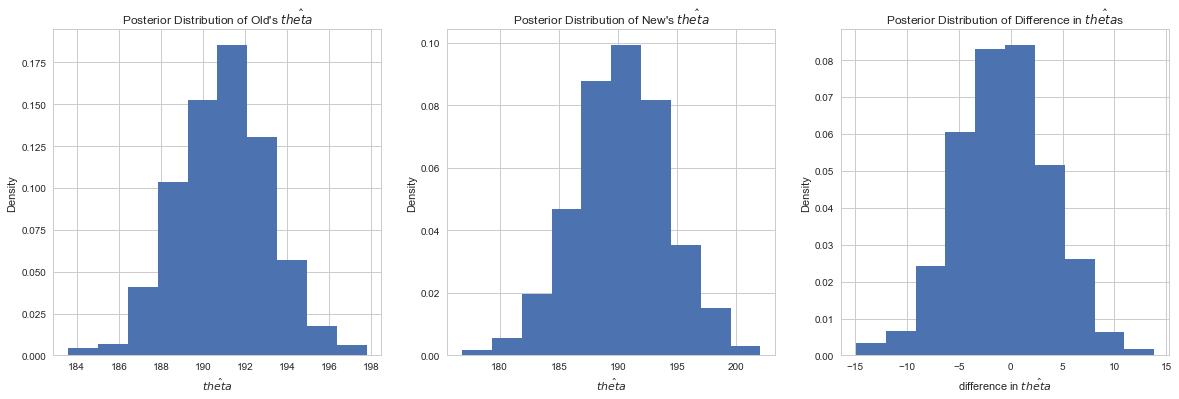

In [21]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( old_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Old's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( new_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of New's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( bs_difference2, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [22]:
print( "90% BCI for start's theta:", stats.mstats.mquantiles( old_posterior, [0.05, 0.95]))
print( "90% BCI for end's theta:", stats.mstats.mquantiles( new_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( bs_difference2, [0.05, 0.95]))

90% BCI for start's theta: [187.5964 194.5677]
90% BCI for end's theta: [183.7246 196.91  ]
90% BCI for difference: [-7.99    6.9718]


It looks like the 90% interval is between -7.99 and 6.97, which does not mean that we can assume that it's significantly different from 0. 

In [23]:
np.mean(bs_difference2 >= 7)

0.049

There is only a 4.9% chance that the new battery can last 7 more minutes than the old battery, which isn't a good sign.

**Question 3.**

In a recent survey, on an important question of economic revitalization, men and women responded as follows:

```
                   Response
                     Yes  No  Total
       Gender    Men  30  70  100
               Women  45  55  100
```

Based on the data, what is the probability that the women were in favor of the question? 

In [24]:
np.random.seed([9235274])

men_theta = 0.3
men_data = [1] * 30 + [0] * 70
np.random.shuffle( men_data)
print( "men's data: ", men_data[0:20])

women_theta = 0.45
women_data = [1] * 45 + [0] * 55
np.random.shuffle( women_data)
print( "women's data: ", women_data[0:20])

men's data:  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
women's data:  [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


In [25]:
mens_mean = np.mean( men_data)
print( "men's mean=", mens_mean)
womens_mean = np.mean( women_data)
print( "women's mean=", womens_mean)
print( "difference=", mens_mean - womens_mean)

men's mean= 0.3
women's mean= 0.45
difference= -0.15000000000000002


In [26]:
men_posterior = bootstrap_sample( men_data, np.mean, 1000)
women_posterior = bootstrap_sample( women_data, np.mean, 1000)
difference3 = men_posterior - women_posterior

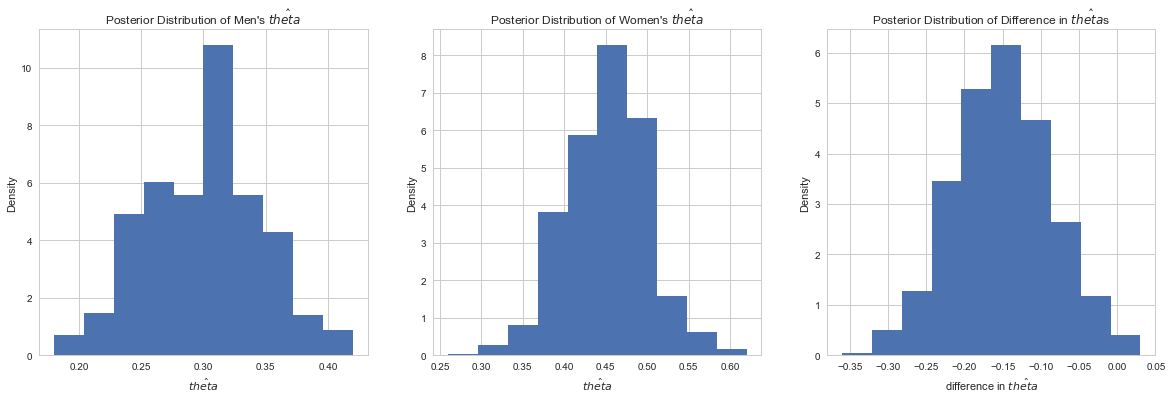

In [27]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( men_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( women_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference3, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [28]:
print( "90% BCI for men's theta:", stats.mstats.mquantiles( men_posterior, [0.05, 0.95]))
print( "90% BCI for women's theta:", stats.mstats.mquantiles( women_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference3, [0.05, 0.95]))

90% BCI for men's theta: [0.22 0.38]
90% BCI for women's theta: [0.37 0.53]
90% BCI for difference: [-0.26 -0.04]


While we were only interested in women's true probability of voting here, I thought that it would be interesting to look at the other metrics. It seems that women were much more likely to vote yes on this question than one, and it's significant at a 10% alpha level. 

However, the answer to the original question is that we can be 90% certain that between 37% and 53% of women wil answer yes to the question. 

In [29]:
np.mean(women_posterior >= .5)

0.181

If the original question actually meant what the probability is that the **majority** of women would vote yes, then there is only a 18.1% chance that the majority of women would vote yes. 

**Question 4.**

In the above question you were able to regenerate the data. In the case of a continuous numeric variable, we're not exactly able to do this. However, given a parameterization and some assumptions about the underlying distribution, there are two possible approaches to solving this problem.

1. We could generate a single sample of size N from the distribution and do M bootstrap samples. (Method 1).
2. We could generate M samples of size N directly from the distribution. (Method 2).

Compare these approaches with the following problem:

"Within a school district, students were randomly assigned to one of two Math teachers - Mrs. Smith and Mrs. Jones. After the assignment, Mrs. Smith had 30 students, and Mrs. Jones had 25 students.

"At the end of the year, each class took the same standardized test. Mrs. Smith's students had an average test score of 78, with a standard deviation of 10; and Mrs. Jones' students had an average test score of 85, with a standard deviation of 15.

"What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers."

Using N = 100 and M = 100:

1. Define what "equally effective might mean".
2. Answer the question using Method 1.
3. Answer the question using Method 2.
4. Comment on any observed similarities or differences between the two results.

In [30]:
n = 100
m = 100

In this question, I am defining "equally effective" as meaning that the difference between Mrs. Smith's class and Mrs. Jones' class as not being significantly different from 0. 

### Method 1

In [31]:
np.random.seed([9235274])
method1_smith = np.random.normal(78,10,n)
method1_jones = np.random.normal(85,15,n)

In [32]:
print('smith mean',np.mean(method1_smith))
print('jones mean',np.mean(method1_jones))
print('smith s.d.',np.std(method1_smith))
print('jones s.d.',np.std(method1_jones))

smith mean 78.47495071566287
jones mean 86.61800356867803
smith s.d. 9.959216018225186
jones s.d. 14.92627453546639


Our randomly generated numbers seem close enough to what we had expected.

In [33]:
smith_posterior = bootstrap_sample( method1_smith, np.mean, m)
jones_posterior = bootstrap_sample( method1_jones, np.mean, m)
difference4 = smith_posterior - jones_posterior

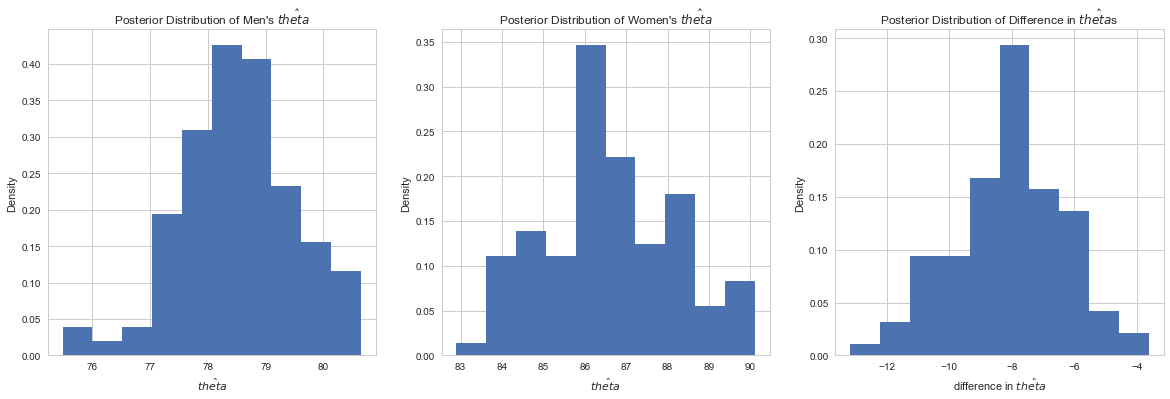

In [34]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( smith_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( jones_posterior, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference4, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [35]:
print( "90% BCI for smith's theta:", stats.mstats.mquantiles( smith_posterior, [0.05, 0.95]))
print( "90% BCI for jones's theta:", stats.mstats.mquantiles( jones_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference4, [0.05, 0.95]))

90% BCI for smith's theta: [76.97044063 80.2052155 ]
90% BCI for jones's theta: [83.95518822 89.46371897]
90% BCI for difference: [-10.92121191  -5.28568234]


Well, it looks like the 90% BCI for the difference between the two classes is -10.92 and -5.29. Since 0 is not within that confidence interval, we can reject the null hypothesis that there is no difference between Smith and Jone's class.

In [36]:
np.mean((difference4 >= -1) & (difference4<=1)) 

0.0

It seems like there isn't any chance that there difference is around 0.

### Method 2

In [37]:
np.random.seed([9235274])
method2_smith = []
method2_jones = []
for i in range(m):
    method2_smith_temp = np.random.normal(78,10,n)
    method2_jones_temp = np.random.normal(85,15,n)
    method2_smith.append(np.mean(method2_smith_temp))
    method2_jones.append(np.mean(method2_jones_temp))
method2_smith = np.array(method2_smith)
method2_jones = np.array(method2_jones)
difference_method2 = method2_smith - method2_jones

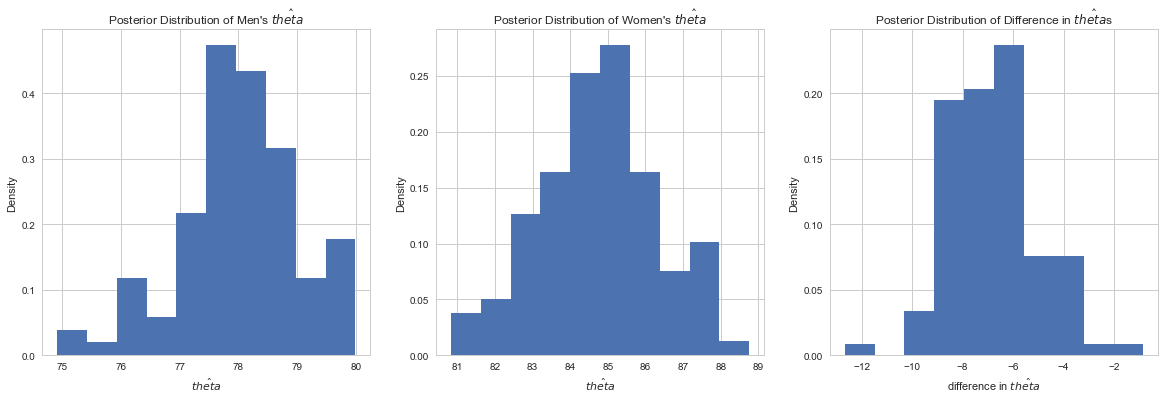

In [38]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( method2_smith, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( method2_jones, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference_method2, density=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [39]:
## from https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data?rq=1

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [40]:
mean_confidence_interval(method2_smith, confidence = .9)

(77.83086726694314, 78.16040604531436)

In [41]:
print( "90% CI for smith's theta:", mean_confidence_interval(method2_smith, confidence = .9))
print( "90% CI for jones's theta:", mean_confidence_interval(method2_jones, confidence = .9))
print( "90% CI for difference:", mean_confidence_interval(difference_method2, confidence = .9))

90% CI for smith's theta: (77.83086726694314, 78.16040604531436)
90% CI for jones's theta: (84.50185093916896, 85.0277316706542)
90% CI for difference: (-7.063875149160153, -6.474434148405497)


It looks like method 2 also generated a 90% CI that produced a result that shows that there is a significant difference between the two classes. There is a 90% chance that the interval (-7.06,-6.47) captures the true population difference between Smith's class and Jone's class.

In [42]:
stats.ttest_ind( method2_smith, method2_jones)

Ttest_indResult(statistic=-36.22112624276094, pvalue=2.7242369537410377e-89)

It appears that the T-test also thinks that there's almost no chance that we can accept the null hypothesis that there is no difference between Smith and Jones classes. 

### Differences between the two methods
Besides the calculation differences, if I did them right, it seems that the second method is much more sure of its intervals. The intervals are smaller and it seems more certain that the populations are different